In [8]:
import numpy as np
import pandas as pd
import scanpy as sc
import SEACells
import sys
sys.path.insert(1, '/home/marta.sallese/ov_cancer_atlas/atlas_project/utils')
from metacells_derivation import preprocess, assign_metacells, create_mc_matrix, preprocess_mc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Some plotting aesthetics 
%matplotlib inline
sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100

In [10]:
initDir = '/group/testa/Project/OvarianAtlas/atlas_project/raw_data/metacells_backup/metacells/endothelial/'
genes = '/home/marta.sallese/ov_cancer_atlas/atlas_project/script/4_hdg/Tables/atlas_hdg_dispersion_patients_endothelial.csv'

In [11]:
adata = sc.read(initDir + 'seacells_assignment_hdg_patients.h5ad')

In [17]:
ad = create_mc_matrix(adata)

100%|██████████| 3333/3333 [00:40<00:00, 83.19it/s]


In [19]:
adata.obs

,ID,sample_name,tissue,developmental_stage,treatment,recurrence,tumor_stage,paper_ID,anatomical_location,patient_id,...,HematopoieticMSK,cell_labels_ratio,max,assignment,leiden-1.8,SEACell,S_score,G2M_score,phase,SEACell_patient_tissue
AAACGGGTCATTCACT-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,-1.090105,1.720629,EndothelialMSK,CancerMSK,33,NaN,-0.068185,-0.041972,G1,nan_Geistlinger_59_Metastasis
AAAGATGAGTACGCCC-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,-0.692664,1.965460,EndothelialMSK,CancerMSK,33,NaN,-0.052809,-0.077061,G1,nan_Geistlinger_59_Metastasis
AAAGATGCACGTCAGC-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,0.341506,1.058860,EndothelialMSK,CancerMSK,20,NaN,-0.040121,-0.067046,G1,nan_Geistlinger_59_Metastasis
AAAGATGGTGACCAAG-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,-1.460877,2.296452,EndothelialMSK,CancerMSK,33,NaN,-0.099649,-0.086095,G1,nan_Geistlinger_59_Metastasis
AAAGCAACACTTGGAT-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,0.030627,1.605352,EndothelialMSK,CancerMSK,20,NaN,-0.051404,-0.003541,G1,nan_Geistlinger_59_Metastasis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTGCGTCCAAAGGCGT,NaN,NaN,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,SPECTRUM-OV-118,...,-1.353612,5.506773,EndothelialMSK,HematopoieticMSK,15,SEACell-54,-0.017385,-0.104796,G1,SEACell-54_Vasquez_118_Metastasis
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTGCTGCGTTTGACAC,NaN,NaN,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,SPECTRUM-OV-118,...,-1.359731,0.000000,EndothelialMSK,HematopoieticMSK,21,SEACell-49,-0.071944,-0.005255,G1,SEACell-49_Vasquez_118_Metastasis
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTGGGATGTTAACCTG,NaN,NaN,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,SPECTRUM-OV-118,...,-1.225922,0.000000,EndothelialMSK,HematopoieticMSK,6,SEACell-12,-0.044998,-0.019155,G1,SEACell-12_Vasquez_118_Metastasis
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTGTGTTCATGCACTA,NaN,NaN,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,SPECTRUM-OV-118,...,-1.524755,1.330027,EndothelialMSK,HematopoieticMSK,15,SEACell-1,-0.052428,-0.079070,G1,SEACell-1_Vasquez_118_Metastasis


In [20]:
adata.obs['SEACell'] = adata.obs['SEACell_patient_tissue']

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


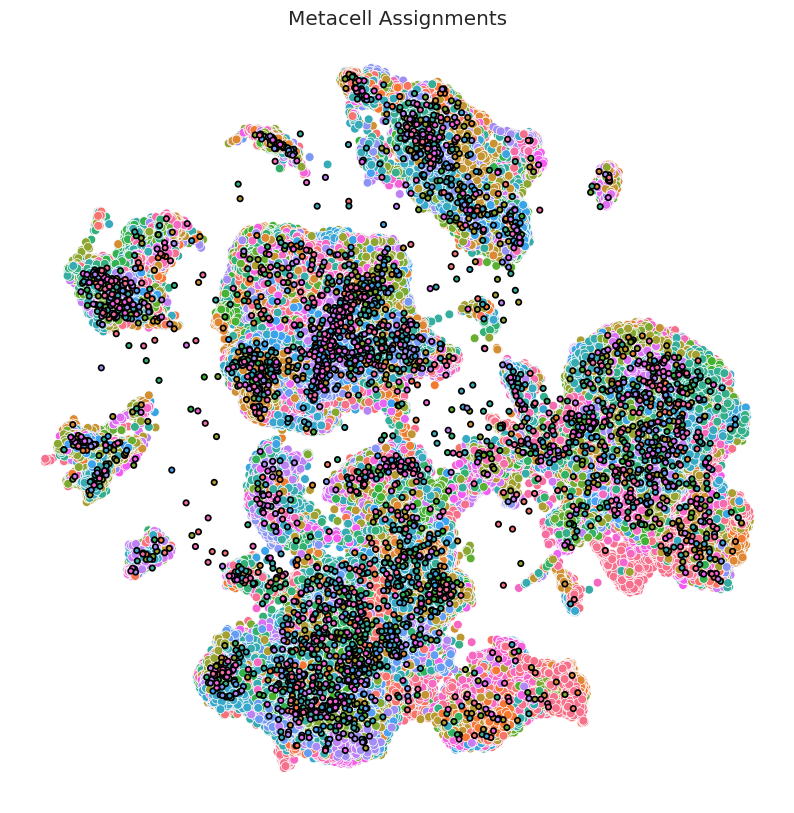

In [22]:
SEACells.plot.plot_2D(adata, key='X_umap', colour_metacells=True, SEACell_size=15, cell_size=40, figsize=(10, 10))

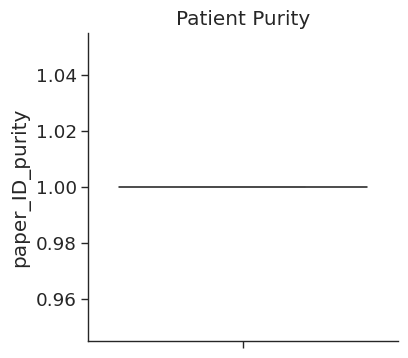

,paper_ID,paper_ID_purity
SEACell,,
SEACell-0_Geistlinger_77_Metastasis,Geistlinger_77,1.0
SEACell-0_Geistlinger_89_Metastasis,Geistlinger_89,1.0
SEACell-0_Geistlinger_90_Metastasis,Geistlinger_90,1.0
SEACell-0_Loret_1_Metastasis,Loret_1,1.0
SEACell-0_Loret_2_Ascites,Loret_2,1.0


In [23]:
SEACell_purity = SEACells.evaluate.compute_celltype_purity(adata, 'paper_ID')

plt.figure(figsize=(4,4))
sns.boxplot(data=SEACell_purity, y='paper_ID_purity')
plt.title('Patient Purity')
sns.despine()
plt.show()
plt.close()

SEACell_purity.head()

Determing nearest neighbor graph...


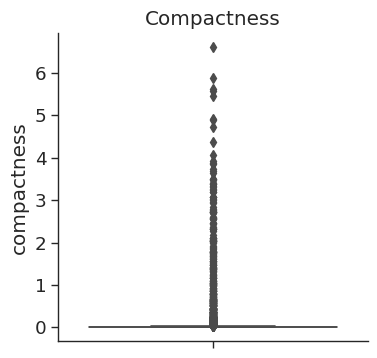

,compactness
SEACell,
SEACell-0_Geistlinger_77_Metastasis,0.001443
SEACell-0_Geistlinger_89_Metastasis,0.237844
SEACell-0_Geistlinger_90_Metastasis,0.024146
SEACell-0_Loret_1_Metastasis,0.000716
SEACell-0_Loret_2_Ascites,0.002262


In [24]:
compactness = SEACells.evaluate.compactness(adata, 'X_pca')

plt.figure(figsize=(4,4))
sns.boxplot(data=compactness, y='compactness')
plt.title('Compactness')
sns.despine()
plt.show()
plt.close()

compactness.head()

Determing nearest neighbor graph...


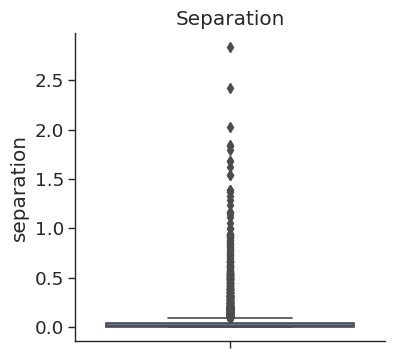

,separation
SEACell,
SEACell-0_Geistlinger_77_Metastasis,0.063502
SEACell-0_Geistlinger_89_Metastasis,0.099995
SEACell-0_Geistlinger_90_Metastasis,0.099695
SEACell-0_Loret_1_Metastasis,0.013401
SEACell-0_Loret_2_Ascites,0.003696


In [25]:
separation = SEACells.evaluate.separation(adata, 'X_pca',nth_nbr=1)

plt.figure(figsize=(4,4))
sns.boxplot(data=separation, y='separation')
plt.title('Separation')
sns.despine()
plt.show()
plt.close()

separation.head()